In [1]:
api_key = ""
channel_id = ""

In [2]:
from googleapiclient.discovery import build
youtube = build("youtube", "v3", developerKey=api_key)

In [3]:
def get_channel_videos(channel_id):
    res = youtube.channels().list(id=channel_id,
                                 part="contentDetails").execute()
    playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    
    videos = []
    next_page_token = None
    
    while 1:
        res = youtube.playlistItems().list(playlistId=playlist_id,
                                          part="snippet",
                                          maxResults=50,
                                          pageToken=next_page_token).execute()
        videos += res["items"]
        next_page_token = res.get("nextPageToken")
        
        if next_page_token is None:
            break
    
    return videos

In [4]:
videos = get_channel_videos(channel_id)

In [5]:
res = youtube.videos().list(id=videos[0]["snippet"]["resourceId"]["videoId"],
                           part="statistics").execute()

In [6]:
video_ids = list(map(lambda x:x['snippet']['resourceId']['videoId'], videos))

In [7]:
def get_videos_stats(video_ids):
    stats = []
    for i in range(0, len(video_ids), 50):
        res = youtube.videos().list(id=','.join(video_ids[i:i+50]),
                                   part='statistics').execute()
        stats += res['items']
    return stats

In [8]:
stats = get_videos_stats(video_ids)

In [9]:
publishedAt = []
title = []
viewCount = []
for i in range(len(videos)):
    publishedAt.append(videos[i]['snippet']['publishedAt'])
    title.append(videos[i]['snippet']['title'])
    viewCount.append(stats[i]['statistics']['viewCount'])

In [10]:
dict = {}
dict["publishedAt"] = publishedAt
dict["title"] = title
dict["viewCount"] = viewCount

In [11]:
import pandas as pd
df = pd.DataFrame.from_dict(dict)

In [12]:
df.head()

,publishedAt,title,viewCount
0,2021-03-17T15:00:23Z,"에이치엘비생명과학과 크리스탈지노믹스, 항암제 공동 임상 개발 추진합니다. (리보세라...",910
1,2021-03-17T09:00:05Z,"넥스트사이언스 아임얼라이브 콤부차 국제 단체 KBI 등록, 프리바이오틱스 풍부",3138
2,2021-03-17T05:10:33Z,에이치엘비 리보세라닙은 '동일 계열 내 최고 의약품'...여보 집문서 가져와!!,16472
3,2021-03-16T21:00:05Z,"에이치엘비, 최적의 조합으로 불리는 아바스틴과 티센트릭 병요요법과 비슷한 수준의 결과?!",6376
4,2021-03-16T09:00:09Z,에이치엘비 NSCLC 완전관해 AACR 학술지에 발표! 과연 표적항암제는 면역항암제...,11371


In [13]:
question = []
not_question = []

In [14]:
for i, title in enumerate(dict['title']):
    if '?!' in title and '에이치엘비' in title:
        question.append(int(dict['viewCount'][i]))
    elif '!' in title and '에이치엘비' in title:
        not_question.append(int(dict['viewCount'][i]))

In [15]:
mean_question = sum(question)/len(question)
mean_not_question = sum(not_question)/len(not_question)

In [16]:
mean_question

7630.703448275862

In [17]:
mean_not_question

8069.571428571428

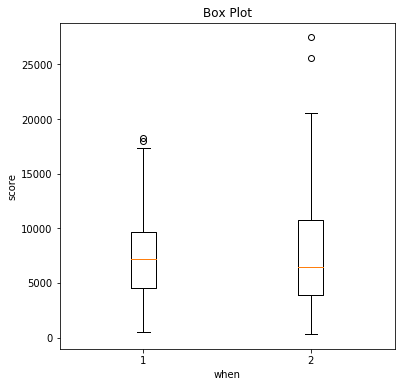

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))
plt.grid()
plt.boxplot([question, not_question])
plt.xlabel('when')
plt.ylabel('score')
plt.title('Box Plot')
plt.grid()
plt.show()

In [19]:
from scipy.stats import ttest_ind
ttest_ind(question, not_question)

Ttest_indResult(statistic=-0.6562711008148875, pvalue=0.5123355201920623)

# Results
에이치엘비와 ?! 영상 조회수는 평균 7630회이고 에이치엘비와 ! 영상 조회수는 평균 8069회이다.(p-value=0.5) 그러므로 ?!와 ! 조회수는 큰 차이가 없다.

# Conclusion
!를 쓴다.